In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
d= pd.read_csv("college_admission_prediction.csv")

In [6]:
d.head()

,Unnamed: 0,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,States
0,0,2015,95,92,2,100,IIT delhi,Delhi
1,1,2015,75,88,3,1023,VIT vellore,Tamil Nadu
2,2,2015,83,84,6,2935,Ahemedabad IT,Gujrat
3,3,2015,75,91,8,5647,University college of ENGG,Andhra Pradesh
4,4,2015,94,94,9,3564,SRMIST chennai,Tamil Nadu


In [7]:
d.tail()

,Unnamed: 0,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,States
999,999,2019,89,81,3,4523,IIT jodhpur,Rajasthan
1000,1000,2019,93,88,1,5511,BIT Mesra,Jharkhnad
1001,1001,2019,86,93,1,100,IIT Bombay,Maharashtra
1002,1002,2019,85,89,9,515,IIT hydrabad,Telangana
1003,1003,2019,78,85,11,1730,IIT indore,Madhya Pradesh


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1004 non-null   int64 
 1   Year           1004 non-null   int64 
 2   10th Marks     1004 non-null   int64 
 3   12th Marks     1004 non-null   int64 
 4   12th Division  1004 non-null   int64 
 5   AIEEE Rank     1004 non-null   int64 
 6   College        1004 non-null   object
 7   States         1004 non-null   object
dtypes: int64(6), object(2)
memory usage: 62.9+ KB


In [9]:
d.describe()

,Unnamed: 0,Year,10th Marks,12th Marks,12th Division,AIEEE Rank
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,501.500000,2017.389442,87.000996,87.935259,4.216135,3348.584661
std,289.974137,1.198507,5.351549,4.704084,2.551972,1963.073509
min,0.000000,2015.000000,74.000000,74.000000,1.000000,45.000000
25%,250.750000,2016.000000,85.000000,85.000000,2.000000,2135.000000
50%,501.500000,2018.000000,88.000000,88.000000,4.000000,3215.000000
75%,752.250000,2018.000000,91.000000,92.000000,6.000000,4523.000000
max,1003.000000,2019.000000,95.000000,95.000000,11.000000,9878.000000


In [10]:
d['Year'].unique()

array([2015, 2016, 2017, 2018, 2019])

In [11]:
d["College"].unique()

array(['IIT delhi', 'VIT vellore', 'Ahemedabad IT',
       'University college of ENGG', 'SRMIST chennai', 'Manipal IT',
       'IIT hydrabad', 'IIT jodhpur', 'BMS college of ENGG', 'IIT bhilai',
       'MNIT jaipur', 'IIT palakkad', 'IIT tirupati', 'KLEF hydrabad',
       'IIT guwahati', 'Jadavpur Univversity', 'MNNIT allahabad',
       'IIT jammu', 'NMIMS', 'S O A  university', 'NIT trichy',
       'IIT kanpur', 'Netaji Subhas IT', 'IIT indore', 'BIT Mesra',
       'HBUT kanpur', 'NIT warangal', 'IIT goa', 'IIEST shibpur',
       'IIT kharagpur', 'BITS pilani', 'IIIT hydrabad', 'MSIT',
       'SSN college of ENGG', 'IIT Bombay', 'DTU delhi', 'IIT mandi',
       'IIT ropar'], dtype=object)

In [12]:
d["College"]=d["College"].apply(str.upper)
d["College"].unique()

array(['IIT DELHI', 'VIT VELLORE', 'AHEMEDABAD IT',
       'UNIVERSITY COLLEGE OF ENGG', 'SRMIST CHENNAI', 'MANIPAL IT',
       'IIT HYDRABAD', 'IIT JODHPUR', 'BMS COLLEGE OF ENGG', 'IIT BHILAI',
       'MNIT JAIPUR', 'IIT PALAKKAD', 'IIT TIRUPATI', 'KLEF HYDRABAD',
       'IIT GUWAHATI', 'JADAVPUR UNIVVERSITY', 'MNNIT ALLAHABAD',
       'IIT JAMMU', 'NMIMS', 'S O A  UNIVERSITY', 'NIT TRICHY',
       'IIT KANPUR', 'NETAJI SUBHAS IT', 'IIT INDORE', 'BIT MESRA',
       'HBUT KANPUR', 'NIT WARANGAL', 'IIT GOA', 'IIEST SHIBPUR',
       'IIT KHARAGPUR', 'BITS PILANI', 'IIIT HYDRABAD', 'MSIT',
       'SSN COLLEGE OF ENGG', 'IIT BOMBAY', 'DTU DELHI', 'IIT MANDI',
       'IIT ROPAR'], dtype=object)

In [13]:
d["College"]=d["College"].replace(['UNIVERSITY COLLEGE OF ENGG'],'UNIVERSITY COLLEGE OF ENGINEERING')
d["College"]=d["College"].replace(['BMS COLLEGE OF ENGG'],'BMS COLLEGE OF ENGINEERING')
d["College"]=d["College"].replace(['JADAVPUR UNIVVERSITY'],'JADAVPUR UNIVERSITY')
d["College"]=d["College"].replace(['MNNIT ALLAHABAD'],'MNIT ALLAHABAD')
d["College"]=d["College"].replace(['S O A UNIVERSITY'],'SOA UNIVERSITY')
d["College"]=d["College"].replace(['BIT MESRA'],'BITS MESRA')
d["College"]=d["College"].replace(['SSN COLLEGE OF ENGG'],'SSN COLLEGE OF ENGINEERING')
d["College"]=d["College"].replace(['AHEMEDABAD IT'],'AHEMDABAD IT')
d["College"]=d["College"].replace(['IIT HYDRABAD'],'IIT HYDERABAD')
d["College"]=d["College"].replace(['IIIT HYDRABAD'],'IIIT HYDERABAD')
d["College"].unique()

array(['IIT DELHI', 'VIT VELLORE', 'AHEMDABAD IT',
       'UNIVERSITY COLLEGE OF ENGINEERING', 'SRMIST CHENNAI',
       'MANIPAL IT', 'IIT HYDERABAD', 'IIT JODHPUR',
       'BMS COLLEGE OF ENGINEERING', 'IIT BHILAI', 'MNIT JAIPUR',
       'IIT PALAKKAD', 'IIT TIRUPATI', 'KLEF HYDRABAD', 'IIT GUWAHATI',
       'JADAVPUR UNIVERSITY', 'MNIT ALLAHABAD', 'IIT JAMMU', 'NMIMS',
       'S O A  UNIVERSITY', 'NIT TRICHY', 'IIT KANPUR',
       'NETAJI SUBHAS IT', 'IIT INDORE', 'BITS MESRA', 'HBUT KANPUR',
       'NIT WARANGAL', 'IIT GOA', 'IIEST SHIBPUR', 'IIT KHARAGPUR',
       'BITS PILANI', 'IIIT HYDERABAD', 'MSIT',
       'SSN COLLEGE OF ENGINEERING', 'IIT BOMBAY', 'DTU DELHI',
       'IIT MANDI', 'IIT ROPAR'], dtype=object)

In [14]:
dict1={1: 'IIT KHARAGPUR', 2:'IIT BOMBAY', 3: 'IIT KANPUR', 4:'IIT DELHI', 5: 'IIT GUWAHATI', 6: 'IIT HYDERABAD', 7: 'IIT JODHPUR', 8: 'IIT ROPAR', 9: 'IIT MANDI', 10: 'IIT PALAKKAD', 11:'IIT TIRUPATI', 12: 'IIT GOA', 13: 'IIT JAMMU', 14: 'IIT INDORE', 15: 'IIT BHILAI', 16: 'NIT WARANGAL', 17: 'NIT TRICHY', 18: 'IIIT HYDERABAD', 19: 'BITS PILANI', 20: 'DTU DELHI', 21: 'VIT VELLORE', 22: 'BITS MESRA', 23: 'MANIPAL IT', 24: 'AHEMDABAD IT', 25: 'MNIT JAIPUR', 26: 'S O A  UNIVERSITY', 27: 'MNIT ALLAHABAD', 28: 'NMIMS', 29: 'MSIT', 30: 'SSN COLLEGE OF ENGINEERING', 31: 'UNIVERSITY COLLEGE OF ENGINEERING', 32: 'SRMIST CHENNAI', 33: 'BMS COLLEGE OF ENGINEERING', 34: 'KLEF HYDRABAD', 35: 'JADAVPUR UNIVERSITY', 36: 'HBUT KANPUR', 37: 'IIEST SHIBPUR', 38: 'NETAJI SUBHAS IT'}

In [15]:
d["States"].unique()

array(['Delhi', 'Tamil Nadu', 'Gujrat', 'Andhra Pradesh', 'Karnataka',
       'Telangana', 'Rajasthan', 'Chhattisgarh', 'Kerala', 'Assam',
       'West Bengal', 'Uttar Pradesh', 'Jammu', 'Maharashtra', 'Odisha',
       'uttar Pradesh', 'Madhya Pradesh', 'Jharkhnad', 'Goa',
       'Himachal Pradesh', 'Punjab'], dtype=object)

In [16]:
d['States']=d['States'].replace(['Gujrat'],'Gujarat')
d['States']=d['States'].replace(['uttar Pradesh'],'Uttar Pradesh')
d['States']=d['States'].replace(['Jharkhnad'],'Jharkhand')
d['States']=d['States'].replace(['Jammu'],'Jammu & Kashmir')
d['States']=d['States'].replace(['Odisha'],'Orissa')

In [17]:
d["States"].unique()

array(['Delhi', 'Tamil Nadu', 'Gujarat', 'Andhra Pradesh', 'Karnataka',
       'Telangana', 'Rajasthan', 'Chhattisgarh', 'Kerala', 'Assam',
       'West Bengal', 'Uttar Pradesh', 'Jammu & Kashmir', 'Maharashtra',
       'Orissa', 'Madhya Pradesh', 'Jharkhand', 'Goa', 'Himachal Pradesh',
       'Punjab'], dtype=object)

In [18]:
d["States"].value_counts()

Tamil Nadu          108
Rajasthan            86
Telangana            78
Uttar Pradesh        75
Karnataka            72
Delhi                67
Maharashtra          62
West Bengal          58
Kerala               50
Gujarat              49
Orissa               49
Andhra Pradesh       42
Jammu & Kashmir      35
Chhattisgarh         32
Madhya Pradesh       30
Goa                  30
Jharkhand            29
Assam                18
Himachal Pradesh     17
Punjab               17
Name: States, dtype: int64

In [19]:
df=pd.read_csv("CAP.csv")
df.head()

,0,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,States,College Rank
0,0,2015,95,92,2,100,IIT DELHI,Delhi,4
1,1,2015,75,88,3,1023,VIT VELLORE,Tamil Nadu,21
2,2,2015,83,84,6,2935,AHEMDABAD IT,Gujarat,24
3,3,2015,75,91,8,5647,UNIVERSITY COLLEGE OF ENGINEERING,Andhra Pradesh,31
4,4,2015,94,94,9,3564,SRMIST CHENNAI,Tamil Nadu,32


In [20]:
X=df[['10th Marks','12th Marks','AIEEE Rank','12th Division']]
c=0
y=df['College Rank']



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)

In [23]:
lrmodel = LinearRegression()
# fit model
lrmodel.fit(X_train, y_train)
t=lrmodel.predict(X_test)

from sklearn import metrics
score = lrmodel.score(X_test, y_test) 
print(score*100)

12.404512321882223


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [25]:
lrmodel = LinearRegression()
# fit model
lrmodel.fit(X_train, y_train)
t=lrmodel.predict(X_test)

from sklearn import metrics
score = lrmodel.score(X_test, y_test) 
print(score*100)

31.106814432329198


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [27]:
lrmodel = LinearRegression()
# fit model
lrmodel.fit(X_train, y_train)
t=lrmodel.predict(X_test)

from sklearn import metrics
score = lrmodel.score(X_test, y_test) 
print(score*100)

27.763536703545853


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=3)

In [29]:
lrmodel = LinearRegression()
# fit model
lrmodel.fit(X_train, y_train)
t=lrmodel.predict(X_test)

from sklearn import metrics
score = lrmodel.score(X_test, y_test) 
print(score*100)

29.855281388447896


In [30]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 4.712109941364111
RMSE value for k=  2 is: 4.92689087877368
RMSE value for k=  3 is: 4.793958100888977
RMSE value for k=  4 is: 4.87159435832252
RMSE value for k=  5 is: 4.922736366426028
RMSE value for k=  6 is: 5.141206729309683
RMSE value for k=  7 is: 5.3889673061038765
RMSE value for k=  8 is: 5.627839250268763
RMSE value for k=  9 is: 5.828254653000953
RMSE value for k=  10 is: 6.091005521152191
RMSE value for k=  11 is: 6.358222805562814
RMSE value for k=  12 is: 6.620062800418247
RMSE value for k=  13 is: 6.786272168629558
RMSE value for k=  14 is: 6.864489630711168
RMSE value for k=  15 is: 6.894213691294112
RMSE value for k=  16 is: 6.934256726983895
RMSE value for k=  17 is: 6.993487870301701
RMSE value for k=  18 is: 7.092383308090641
RMSE value for k=  19 is: 7.074397380943226
RMSE value for k=  20 is: 7.056837480336401


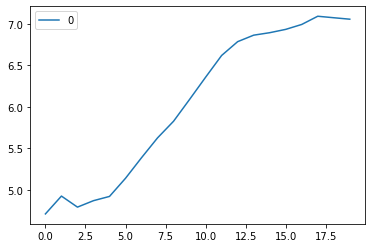

In [31]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [32]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)

In [35]:
knrmodel = KNeighborsRegressor(n_neighbors=2)
knrmodel.fit(X_train, y_train)
t=knrmodel.predict(X_test)
score = knrmodel.score(X_test, y_test) 
print(score*100)

90.85571820865938


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [37]:
knrmodel = KNeighborsRegressor(n_neighbors=2)
knrmodel.fit(X_train, y_train)
t=knrmodel.predict(X_test)
score = knrmodel.score(X_test, y_test) 
print(score*100)

90.83896454908054


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [39]:
knrmodel = KNeighborsRegressor(n_neighbors=2)
knrmodel.fit(X_train, y_train)
t=knrmodel.predict(X_test)
score = knrmodel.score(X_test, y_test) 
print(score*100)

91.26670285296582


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=3)

In [41]:
knrmodel = KNeighborsRegressor(n_neighbors=2)
knrmodel.fit(X_train, y_train)
t=knrmodel.predict(X_test)
score = knrmodel.score(X_test, y_test) 
print(score*100)


77.42767945920565


In [42]:
# using feature scaling
# from sklearn.preprocessing import StandardScaler
# X_sc = StandardScaler()
# X_train = X_sc.fit_transform(X_train)
from sklearn.tree import DecisionTreeRegressor
dtrmodel = DecisionTreeRegressor(random_state = 0)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.1)

In [44]:
dtrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)


95.9088804876167


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [46]:
dtrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

95.86105043982624


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [48]:
dtrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

97.53187804517998


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=3)

In [50]:
dtrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

84.08319753631994


In [51]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators= 1000, random_state=100)


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)


In [53]:
rfrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

77.16536245948011


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)


In [55]:
rfrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

85.46554921892472


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)


In [57]:
rfrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

83.60760648408878


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=3)


In [59]:
rfrmodel.fit(X_train, y_train)
t = dtrmodel.predict(X_test)
#Accuracy of the algorithm
score = dtrmodel.score(X_test, y_test) 
print(score*100)

84.08319753631994


In [60]:
state2=input('Enter State   :   ')

Enter State   :   West Bengal


In [69]:
df=pd.read_csv("CAP.csv")
filter1 = df["States"]==state2
filter2 = df["College Rank"]<t[4]
df.where(filter1 & filter2, inplace = True)
df=df.sort_values("States", inplace = False)
#pd.set_option('display.max_rows', None)
collist=[]
print(df['College'])
for i in df["College"]:
    if i not in collist:
        collist.append(i)

collist.pop()
for i in dict1:
    for j in collist:
        if dict1[i]==j:
            print(j)
#for i in collist:
 #   print(i)


108     IIT KHARAGPUR
509     IIT KHARAGPUR
264     IIT KHARAGPUR
262     IIT KHARAGPUR
259     IIT KHARAGPUR
            ...      
999               NaN
1000              NaN
1001              NaN
1002              NaN
1003              NaN
Name: College, Length: 1004, dtype: object
IIT KHARAGPUR
